In [56]:
from sklearn import datasets

In [57]:
data=datasets.load_diabetes()

In [58]:
targets=data["target"]
features=data["data"]

In [59]:
features.shape,targets.shape

((442, 10), (442,))

In [60]:
# note you have to apply pca to dataset because in matplot lib you can only 
# polt in 2d 

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns


In [62]:
from sklearn.decomposition import PCA

In [63]:
pca = PCA(n_components=2)
components = pca.fit_transform(features)

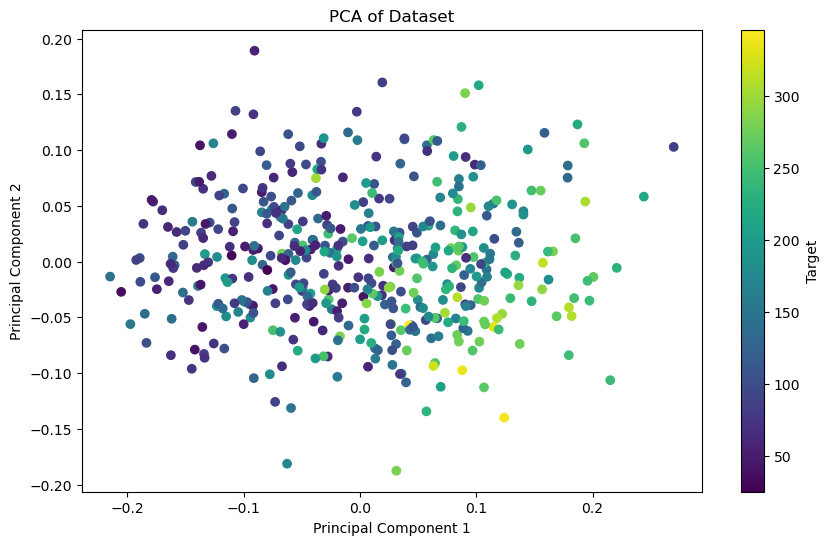

In [64]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(components[:, 0], components[:, 1], c=targets, cmap='viridis')
plt.colorbar(scatter, label='Target')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.show()

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test=train_test_split(features,targets,test_size=0.2,random_state=123)

In [67]:
x_train.shape,y_train.shape

((353, 10), (353,))

In [82]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression # it is classification not regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.ensemble import VotingRegressor

In [83]:
reg1=RandomForestRegressor(random_state=2)
reg2=KNeighborsRegressor()
reg3=GradientBoostingRegressor()
reg4=SVR()

In [84]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [85]:
estimators=[('rf', reg1), ('knn', reg2), ('GBR', reg3),('svr', reg4)]

In [89]:
# print seprate accuracy of models
for _,estimator in estimators:
    lst=cross_val_score(estimator,x_train,y_train,cv=10,scoring="r2")
    print(_,np.mean(lst))
    

rf 0.37864400137685517
knn 0.3475632016516201
GBR 0.3389630155667736
svr 0.11001093579559178


In [90]:
## for voting regression 

In [91]:
ereg = VotingRegressor(estimators=estimators)
lst=cross_val_score(ereg,x_train,y_train,cv=5,scoring="r2")
np.mean(lst)

0.4095822957408384

In [99]:
# giving wegihts to model in voting regressor

In [100]:
vr=VotingRegressor(estimators=estimators,weights=[5,4,3,1]) # i have assign random weights

lst=cross_val_score(vr,x_train,y_train,cv=10,scoring="r2")
print(np.mean(lst))

0.39889245648738264
